<a href="https://colab.research.google.com/github/TWO-ONE-21/iris-classification-project/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Klasifikasi Spesies Bunga Iris (Machine Learning)

**Oleh: Ardo Rianda**

---

Project ini bertujuan untuk membangun sebuah *machine learning model* yang mampu melakukan klasifikasi tiga spesies bunga Iris (Iris setosa, Iris versicolor, dan Iris virginica) berdasarkan empat *features*: panjang dan lebar sepal, serta panjang dan lebar petal. Dataset yang digunakan adalah 'Iris dataset' klasik yang tersedia di *library* Scikit-learn. *Workflow* project mencakup *data loading*, *exploratory data analysis* (EDA), *preprocessing*, *training model* K-Nearest Neighbors (KNN), dan *evaluation*. Model yang dihasilkan berhasil mencapai *accuracy* 100% pada *test data*, menunjukkan kemampuannya untuk melakukan *generalization* dengan sangat baik untuk *dataset* ini.

**Tools & Libraries:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.

## 1. Environment Setup dan Import Libraries

Langkah pertama dalam setiap *project data sience* adalah mempersiapkan *working environment*. Pada tahap ini, kita melakukan `import` semua *library* Python yang diperlukan untuk keseluruhan *workflow*, mulai dari manipulasi data (Pandas, NumPy), visualisasi (Matplotlib, Seaborn), hingga *modeling* dan *evaluation* (Scikit-learn)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. MEmuat dan Inspeksi Data

Dataset Iris dimuat langsung dari `sklearn.datasets`. Setelah dimuat, data dikonversi menjadi sebuah DataFrame Pandas untuk kemudahan analisis. Proses inspeksi awal dilakukan menggunakan method `.head()`, `.info()`, dan `.describe()` untuk:
1.  Melihat beberapa *sample* pertama dari data.
2.  Memastikan tidak ada *missing values*.
3.  Memahami *data types* dan *statistical summary* dari setiap *feature*.

In [ ]:
from sklearn.datasets import load_iris
iris_bunch = load_iris()
iris_df = pd.DataFrame(data=iris_bunch.data, columns=iris_bunch.feature_names)
iris_df['species_label'] = iris_bunch.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_label      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 3. Exploratory Data Analysis (EDA)

Tujuan dari EDA adalah untuk memahami *dataset* lebih dalam melalui visualisasi. Kita ingin mengidentifikasi *patterns*, *relationships* antar *features*, dan *features* mana yang paling berpotensi untuk menjadi *discriminator* antar *class*.

### 3.1. Visualisasi Relationships (Pair Plot)
Sebuah `pairplot` dibuat untuk memvisualisasikan *relationship* antara setiap pasangan *feature*, diwarnai berdasarkan spesies. Dari *plot* ini, terlihat jelas bahwa spesies *Iris setosa* sangat mudah dipisahkan dari dua spesies lainnya. Selain itu, *features* yang berkaitan dengan petal (`petal length` dan `petal width`) menunjukkan *discriminative power* yang jauh lebih baik dibandingkan *features* sepal.

### 3.2. Analisis Korelasi (Correlation Heatmap)
Untuk mengonfirmasi *insight* visual, sebuah *correlation heatmap* dibuat. *Heatmap* ini menunjukkan secara numerik bahwa `petal_length` dan `petal_width` memiliki korelasi positif terkuat dengan *target* (0.95 dan 0.96). Hal ini menguatkan hipotesis bahwa kedua *feature* tersebut adalah *predictor* yang paling signifikan.

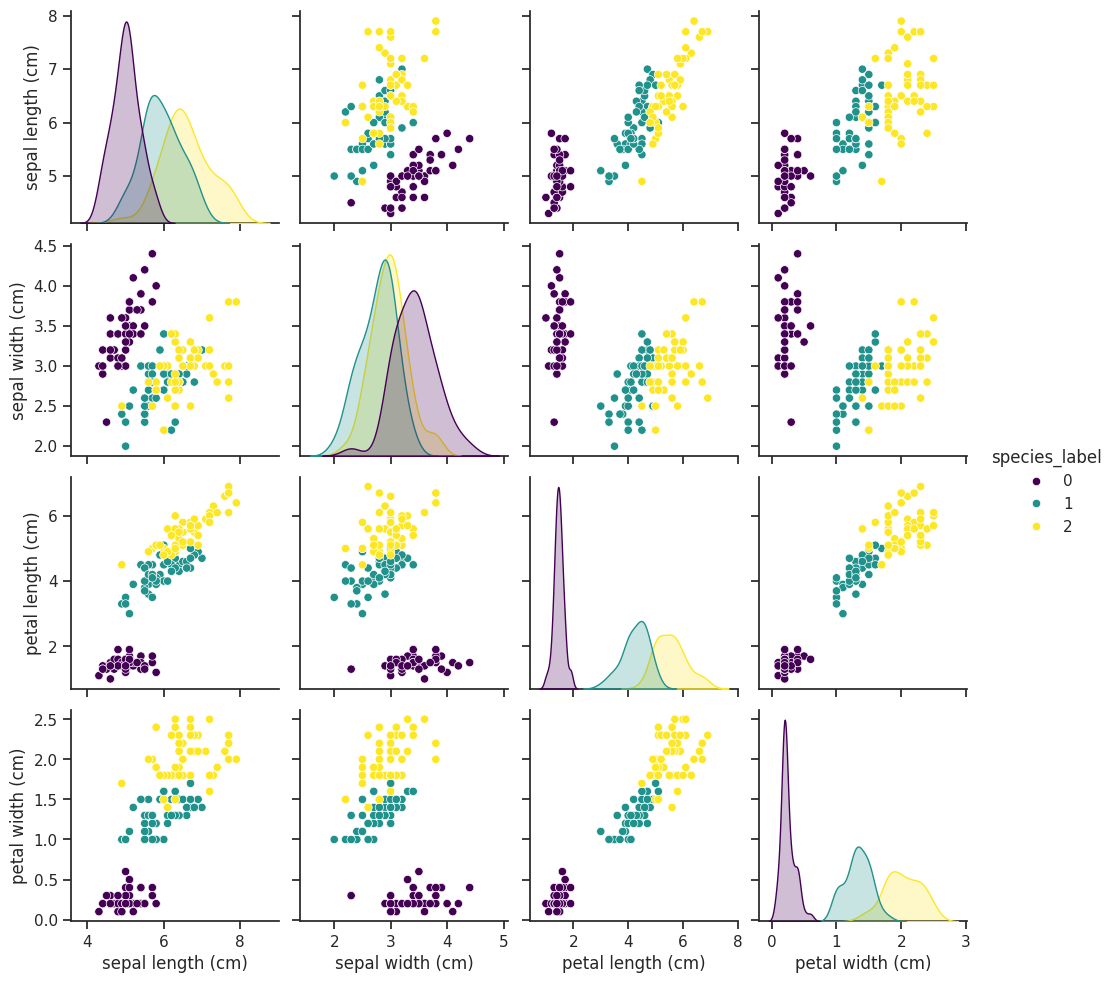

In [ ]:
sns.set(style="ticks")
sns.pairplot(iris_df, hue="species_label", palette="viridis")
plt.show()

## 4. Data Preprocessing

Sebelum melakukan *training* pada model, *dataset* perlu disiapkan. Proses ini melibatkan dua langkah utama:
1.  **Pemisahan Features (X) dan Target (y)**: Memisahkan *feature columns* dari *target column* yang akan diprediksi.
2.  **Train-Test Split**: Membagi keseluruhan *dataset* menjadi dua bagian: 80% data untuk *training model* (`training set`) dan 20% data yang "disembunyikan" untuk *objective evaluation* (`testing set`). Penggunaan `random_state` memastikan *split* ini konsisten dan *reproducible*.

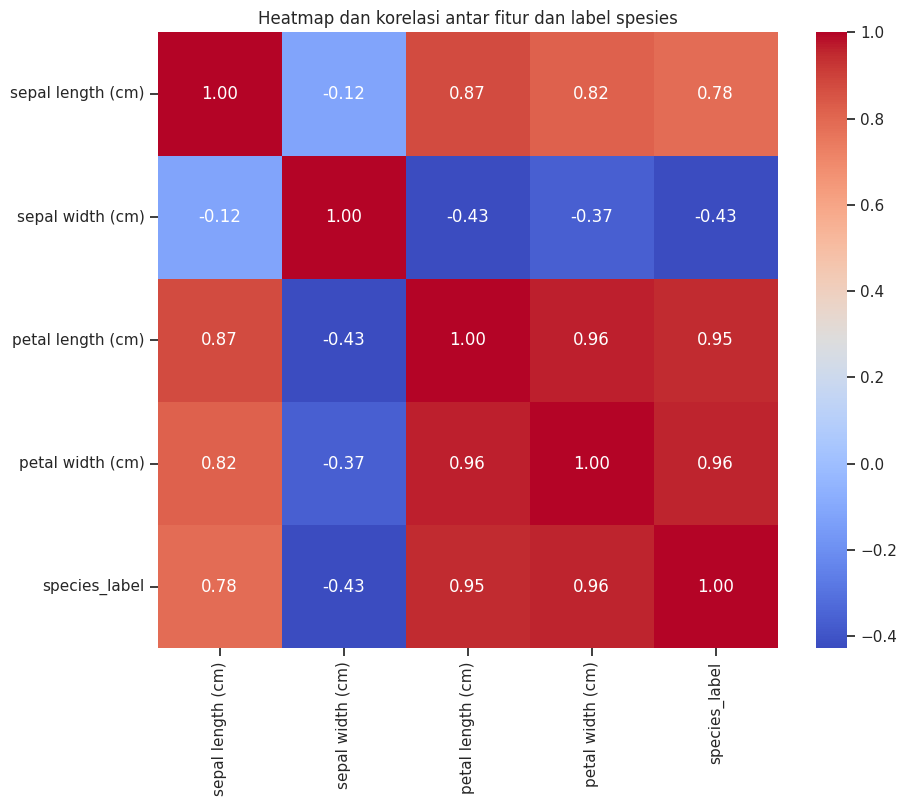

In [ ]:
correlation_matrix = iris_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Heatmap dan korelasi antar fitur dan label spesies")
plt.show()

## 5. Model Building dan Training

*Classification model* yang dipilih untuk *project* ini adalah **K-Nearest Neighbors (KNN)**, sebuah algoritma yang sederhana, intuitif, dan efektif untuk *dataset* ini. Model diinisialisasi dengan *hyperparameter* `n_neighbors=3` (K=3).

Selanjutnya, model dilatih menggunakan *method* `.fit()` pada `training data` (`X_train` dan `y_train`). Selama proses ini, model "mempelajari" *patterns* dan *relationships* antara *features* dan *target* dari data yang diberikan.

In [ ]:
X = iris_df.drop("species_label", axis=1)
y = iris_df["species_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran X_train (fitur latih):", X_train.shape)
print("Ukuran X_test (fitur uji):", X_test.shape)
print("Ukuran y_train (fitur latih):", y_train.shape)
print("Ukuran y_test (fitur uji)", y_test.shape)

Ukuran X_train (fitur latih): (120, 4)
Ukuran X_test (fitur uji): (30, 4)
Ukuran y_train (fitur latih): (120,)
Ukuran y_test (fitur uji) (30,)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
print("Model K-Nearest neighbors (dengan K=3) berhasil dilatih")

Model K-Nearest neighbors (dengan K=3) berhasil dilatih


## 6. Model Evaluation

Tahap terakhir adalah mengukur *performance* model yang telah dilatih pada data yang disembunyikan. Prediksi dibuat pada `X_test`, kemudian hasilnya dibandingkan dengan *actual labels* (`y_test`).

Hasil *evaluation* menunjukkan:
* **Accuracy**
 <br>Model mencapai **accuracy 100%**, yang berarti semua 30 *sample* pada *test data* berhasil diklasifikasikan dengan benar.
* **Classification Report & Confusion Matrix**
 <br>Matriks ini mengonfirmasi *perfect performance* di semua *class* (nilai *precision*, *recall*, dan *f1-score* adalah 1.0). *Confusion matrix* juga menunjukkan tidak ada *misclassifications* (semua nilai berada pada diagonal utama).

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model = {accuracy * 100:.2f}%")
print("-" * 50)
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred, target_names=iris_bunch.target_names))
print("-" * 50)
print("Matriks kebingungan (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))

Akurasi model = 100.00%
--------------------------------------------------
Laporan klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Matriks kebingungan (Confusion Matrix):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Kesimpulan

Project ini berhasil mendemonstrasikan *end-to-end machine learning workflow* untuk sebuah masalah klasifikasi. Melalui *exploratory data analysis*, kita berhasil mengidentifikasi bahwa *petal features* adalah *key predictors*. Model K-Nearest Neighbors (KNN) yang di-*train* mampu memanfaatkan *patterns* ini secara efektif dan mencapai **akurasi 100%** pada *test set*.

Hasil ini membuktikan bahwa bahkan dengan model yang relatif sederhana, *performance* yang sangat tinggi dapat dicapai pada *dataset* yang memiliki *class* yang *well-separated*.